# 1. Preparation for openCV

## 1.0 Resources:

This notebook page is based on many resources. Here is the list of the main of them:

- [opencv toturial playlist by sentdex](https://www.youtube.com/watch?v=Jvf5y21ZqtQ&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=2)
- [opencv documentation](https://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html#face-database)

This includes:
- [opencv Basic Operations on Images](https://docs.opencv.org/3.1.0/d3/df2/tutorial_py_basic_ops.html)


## 1.1 installation

### 1.1.1 core openCV library

on python, you just need to run ```pip install opencv-python```.
The library is available under the following python directory index:
https://pypi.python.org/pypi/opencv-python


### 1.1.2 dependencies

The following dependencies might be needed throughout our journey. Better to install them.

``` # install Dependencies from the command line:
pip install numpy
pip install matplotlib
```

## 1.2 Dataset

In case for any need to datasets, I am using a simple dataset for the porpuse of learning and kicking off. The dataset I took is from this website:
http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html


## 1.3 OpenCV Basics

In [1]:
# important imports:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## make sure to install dependencies above.

### 1.3.1 Image reading

#### 1.3.1.1 from a file

you can read an image from a file as follows:

In [2]:
img = cv2.imread('dataset/att_faces/orl_faces/s1/1.pgm')

The above line will read an image from a file.

```imread``` allows to read an image and applying some filters to it. You can have ```cv2.IMREAD_GRAYSCALE```, ```cv2.IMREAD_COLOR``` or ```cv2.IMREAD_UNCHANGED``` filters fed as parameters to cv.imread() method. Moreover, you can use constants instead of this big words as follows:

IMREAD_GRAYSCALE: 0

IMREAD_COLOR: 1

IMREAD_UNCHANGED: -1

If there is no parameter specified, the image will be retrived full colored but the alpha channel is removed. [ up to now, I know nothing about this alpha channel :) ].

The dataset I am using is already in grayscale. Thus, there is no need to filter it.

#### 1.3.1.2 from a camera video stream

you can also capture an image from the laptop camera. The following code can do that job for you:

In [7]:
video_cam = cv2.VideoCapture(0) 
# The number 0 indicates the camera used in the case of multiple connected cameras to the machine.

while True:
    # this while loop will start a video using the spcified camera
    
    ret, frame = video_cam.read()
    # ret is a boolean variable 
    # frame is the returned image
    
    cv2.imshow('camera video', frame)
    # showing the image
    
    # SOME LIVE IMAGE MANIPULATIONS:
    
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # this command will change the frame to gray frame
    # notice that the openCV reads RGB reversed as BGR!!
    
    # frame = cv2.flip(frame,0)
    # This command is another manipulation command to flip an image around an axis!!
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        # breaking the infinite loop if the q char is recieved
        # 0xFF is the key
        
        camera_img = frame
        # save the frame
        
        break

video_cam.release()
# release the resource

cv2.destroyAllWindows()
# destroy all images

### 1.3.2 Image saving

If the image is taken from a video stream. It may need to be saved after manipulation. To save an image, take this line:

In [8]:
cv2.imwrite('saved_imgs/camera_img.jpg', camera_img)
# This function returns a boolean indicating whether the operation is completed successfully.
# be sure that the folder saved_img does exist!! otherwise,
# creation of this folder cannot performed due to permissions I Guess!!

# openCV allows you to save the whole video. To do that, follow the instructions in this toturial from opencv documentation:
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html


True

### 1.3.2 Image viewing

Technically, there are two main ways to view an image. One way is to use the imshow module provided by the cv2 library or using matplotlib library.

#### 1.3.2.1 using imshow

The command ```imshow(title, img)``` is used to show the image on a separate window.The first parameter is the title of the viewing window and the second parameter is the variable holding the image.

The command ```cv2.waitKey(0)``` listens for any key to be pressed. If that happens, The next line ```cv2.destroyAllWindows()``` will be called to close all opening windows. Later, we may need this listener for any manipulations.

In [5]:
cv2.imshow('camera img', camera_img)
cv2.waitKey(0)
# The argument is the time in milliseconds.
# The function waits for specified milliseconds for any keyboard event.
# If you press any key in that time, the program continues.

cv2.destroyAllWindows()

#### 1.3.2.2 using matplotlib

As the name suggests, matplotlib is a python library for plotting. It is also well known and applied in many other fields such as machine learning and statistics manipulations to visualize data.

Here, I am using it to view images "look to the following code". 

one thing to notice is that the image is viewed along with the x-y cordinates.

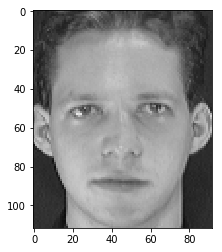

In [6]:
plt.imshow(img)

Interestingly, you can use this library to plot on images as well! look at the following code:

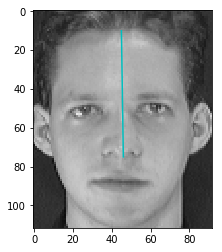

In [7]:
plt.plot([45, 46], [10, 75], 'c')
plt.imshow(img)

### 1.3.3 Image manipulations

as mentioned earlier, matplotlib has more to do with images printed with it. Someone may plot on images and show them. However, OpenCV library has its own methodology to do these manipulations, this is what will be covered in this section.

#### 1.3.3.1 Shape drowings

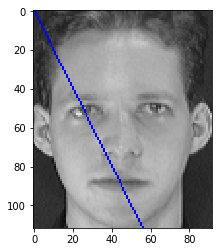

In [143]:
# drow a line:
# first copy the image so that you save the original image
img_blue_line = img.copy()
cv2.line(img_blue_line, (0,0), (60, 120), (0, 0, 255))
# first parameter is the image,
# second parameter is the first point of the line,
# third parameter is the second point of the line,
# fourth parameter is the color of the line.
plt.imshow(img_blue)

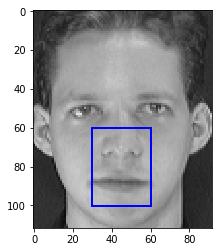

In [152]:
# drow rectanguler
img_blue_rect = img.copy()
cv2.rectangle(img_blue_rect, (30, 60), (60, 100), (0,0,255), 1)
# the first paramenter is the image,
# the second parameter is the top right corner of the image
# the third parameter is the bottum right corner of the image
# the fourth parameter is the color of the rect
# the last parameter is the thickness of the rectangular
plt.imshow(img_blue_rect)

By the same way, one can drow other shapes such as circles and polygones. The reader may go through the documentation to read more about them.

#### 1.3.3.2 write on images

OpenCV allows the developer to write on images as well. Follow this code to do so:

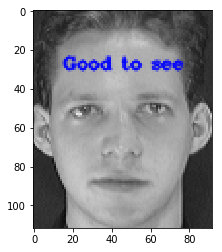

In [185]:
img_text = img.copy()
font = cv2.FONT_HERSHEY_COMPLEX # there are plenty of them!!
cv2.putText(img_text, "Good to see", 
            (15, 30), font, 0.3, (0,0,255), 1, cv2.LINE_AA)
# the first parameter is the image
# the second parameter is the text to show,
# the third paramter is the font, you may refer to the doc for more,,
# the fourth parameter is the size of the text
# the fifth parameter is the color of the text
# the sixth paramter is the ammm, better to look to the doc or try it, I do not know ;)
# the seventh paramter is the font type I guess,
plt.imshow(img_text)

Up to this point, we have a gentle introduction to OpenCV with python.
We now know how get download the library and how to read, save and view images. We also know how to did little manipulations on these images.

The next document will talk about some images operations.
see you there!!